In [1]:
import matplotlib.pyplot as plt
from matplotlib import pylab
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.ticker as ticker
from osgeo import gdal
import salem
from salem import *

In [2]:
fl_path = '/home/pelto/Desktop/ice_flux/Conrad/'
vdir ='img1_20160417__img1_20170521_vmap_5.0m_35px_spm2/'
vdir1 = '/home/pelto/Desktop/velocity_mapping/Conrad_DEMs/spm2/' + vdir
path = '/media/pelto/serac_backup/Lidar_DEMs/bare_earth_BC_hydro/conrad/'

In [3]:
def flux_gate_velocity(vdir, msk, gates):  #, gates, points)#, be_dem, snow_dem, msk):
    # open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
    VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
    VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
    vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
    vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
    msk = salem.open_xr_dataset(path+ msk) 
    msk = msk.to_array()
#     pts = salem.read_shapefile(fl_path+pts)
    gates = salem.read_shapefile(fl_path+gates)
#     msk[msk == 0.0] = 2.0
#     msk[msk == 1.0] = np.nan

    vx = vx.to_array()
    vy = vy.to_array()
    
    vx.data[msk.data==0] = np.nan
    vy.data[msk.data==0] = np.nan

    #     # map extent
    grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000))
    #     grid = vx.salem.grid
    sm = Map(grid, countries=False)
    sm.set_lonlat_contours(interval=0)
    sm.set_scale_bar()
    sm.set_data(vx)
    #      Change the lon-lat countour setting
    sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')
    
    
    shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
    gdf = salem.read_shapefile(shpf)
    sm.set_shapefile(gdf, linewidth=1)
    sm.set_shapefile(gates, linewidth=1.5, color='r')
    sm.visualize()
    plt.show()

    fig, ax = plt.subplots()
    X = vx.x
    print(vx.x)
    Y = vy.y
    U = vx.data
    V = vy.data
    Q = ax.quiver(X, Y, U, V, units='xy', angles='uv')

    
    
    return vx

In [4]:
# velX = flux_gate_velocity(vdir, 'conrad_2016_ice_msk_5m_glacieronly.tif', 'conrad_flux_gates_17.shp')
# 'conrad_points_17gates.shp')

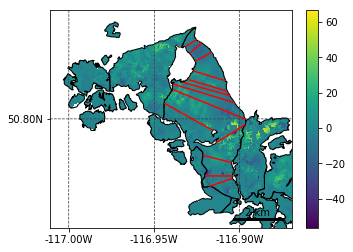

In [5]:
gates = 'conrad_flux_gates_17.shp'
msk='conrad_2016_ice_msk_5m_glacieronly.tif'



# open GeoTIFF as array
#    msk='conrad_2016_ice_msk_5m_glacieronly.tif'
VX = vdir1 + vdir[:-1] + '-F_vx.tif' 
VY = vdir1+ vdir[:-1] + '-F_vy.tif' 
vx = salem.open_xr_dataset(VX)  #gdal.Open(vx).ReadAsArray()
vy = salem.open_xr_dataset(VY)#gdal.Open(vy).ReadAsArray()
msk = salem.open_xr_dataset(path+ msk) 
msk = msk.to_array()
#     pts = salem.read_shapefile(fl_path+pts)
gates = salem.read_shapefile(fl_path+gates)
#     msk[msk == 0.0] = 2.0
#     msk[msk == 1.0] = np.nan

vx = vx.to_array()
vy = vy.to_array()

vx.data[msk.data==0] = np.nan
vy.data[msk.data==0] = np.nan

#     # map extent
grid = mercator_grid(center_ll=(-116.94, 50.80), extent=(10000, 9000))
#     grid = vx.salem.grid
sm = Map(grid, countries=False)
sm.set_lonlat_contours(interval=0)
sm.set_scale_bar()
sm.set_data(vx)
#      Change the lon-lat countour setting
sm.set_lonlat_contours(add_ytick_labels=True, interval=0.05, linewidths=0.75, linestyles='--', colors='0.25')


shpf = '/home/pelto/Desktop/lidar_cbt_analysis/conrad/Conrad/conrad_all_glaciers_2014.shp'
gdf = salem.read_shapefile(shpf)
sm.set_shapefile(gdf, linewidth=1)
sm.set_shapefile(gates, linewidth=1.5, color='r')
sm.visualize()
plt.show()

MemoryError: 

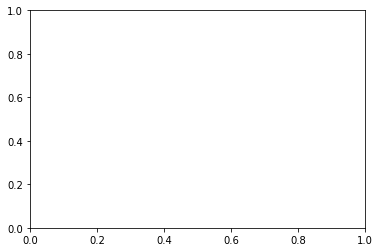

In [6]:
fig, ax = plt.subplots()

# X = vx.coords['x']
# print('vxx:', X)
X, Y = np.meshgrid(vx.x, vy.y)
# Y = vy.y
U, V = np.meshgrid(vx.data, vy.data)
# U = vx.data
# V = vy.data

Q = ax.quiver(X, Y, U, V, units='width', angles='uv') 

#     plt.quiver(vx.x, vx.y, vx.data ,vy.data)
plt.show()